In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

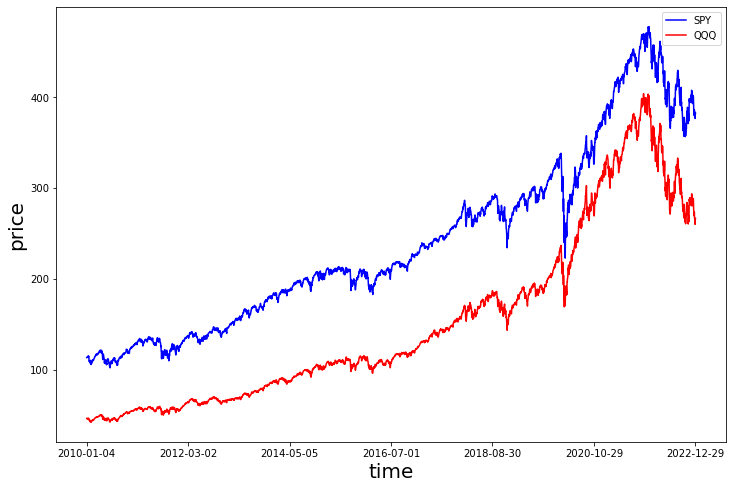

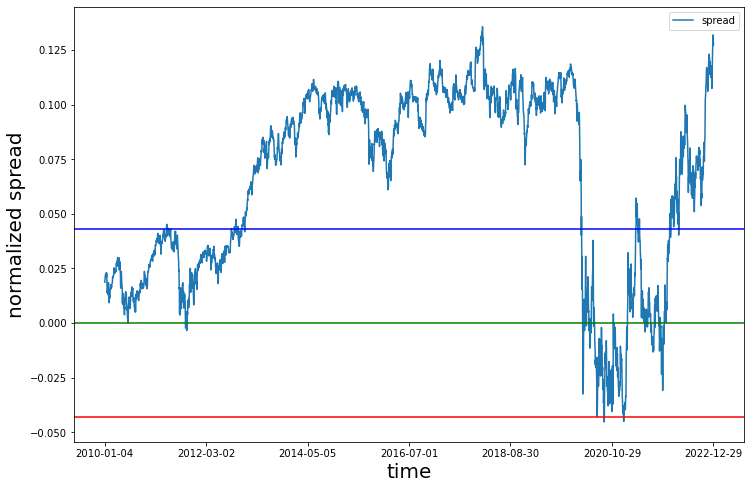

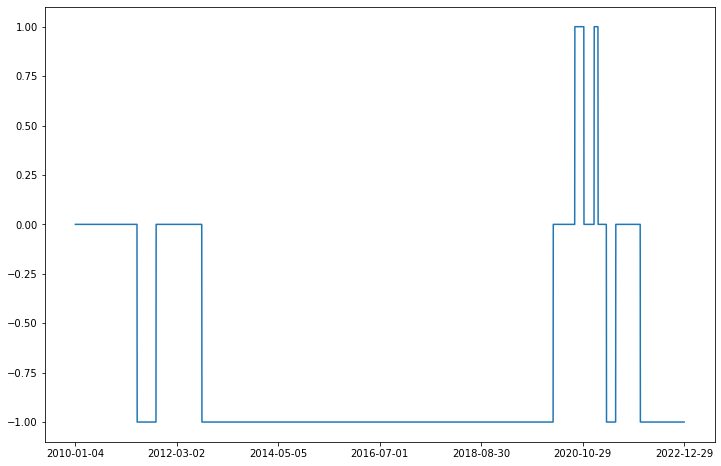

Threshold:0.04296361784247916

Price Difference:[0.01871362 0.01951252 0.02050008 ... 0.12891325 0.12943163 0.12718452]

Strategy vector:[ 0.  0.  0. ... -1. -1. -1.]


In [33]:
class benchmarkModel:
    
    def __init__(self, index1, index2):
        
        self.index1_name = index1.upper()
        self.index2_name = index2.upper()
        # can directly use Yahoo finance to download data
        self.index1_data = pd.read_csv(self.index1_name+'.csv')
        self.index2_data = pd.read_csv(self.index2_name+'.csv')
        
        self.index1_price = self.index1_data['Close']
        self.index2_price = self.index2_data['Close']
        
        self.n = len(self.index1_price)
        
        self.diff_price = self.threshold()[1]
        self.thresh = self.threshold()[0]
        
        self.strategy = self.generate_profit()
        
    def __repr__(self):
        return "benchmarkModel()"
    
    def __str__(self):
        return f'Threshold:{self.thresh}\n\nPrice Difference:{self.diff_price}\n\nStrategy vector:{self.strategy}'
        
    def draw_price(self):
        plt.figure(figsize=(12,8))
        
        plt.plot(self.index1_data['Date'], self.index1_price, color='b', label=self.index1_name)
        plt.plot(self.index1_data['Date'], self.index2_price, color='r', label=self.index2_name)
        plt.xticks(self.index1_data['Date'][::self.n//6])
        plt.xlabel('time',size=20)
        plt.ylabel('price',size=20)
        plt.legend()
        plt.show()
        return
    
    def threshold(self):
        diff_price = np.zeros(self.n)

        for i in range(self.n):
            norm_s = (self.index1_price[i]-min(self.index1_price)) / (max(self.index1_price)-min(self.index1_price))
            norm_q = (self.index2_price[i]-min(self.index2_price)) / (max(self.index2_price)-min(self.index2_price))
            diff_price[i] = norm_s - norm_q
            
        thresh = np.std(diff_price)
        return(thresh, diff_price)
        
    def draw_norm_spread(self):
        plt.figure(figsize=(12,8))

        plt.plot(self.index1_data['Date'],self.diff_price,label='spread') # diff_price := self.threshold()[1]
        plt.axhline(y = self.thresh, color = 'b') # thresh := self.threshold()[0]
        plt.axhline(y = 0, color = 'g')
        plt.axhline(y = -self.thresh, color = 'r')
        plt.xticks(self.index1_data['Date'][::self.n//6])
        plt.xlabel('time',size=20)
        plt.ylabel('normalized spread',size=20)
        plt.legend()
        plt.show()
        return
    
    def generate_profit(self):
        strategy = np.zeros(self.n)

        for i in range(1,self.n):
            if self.diff_price[i] > self.thresh or (strategy[i-1] == -1 and self.diff_price[i] > 0):
                strategy[i] = -1
            elif self.diff_price[i] < -self.thresh or (strategy[i-1] == 1 and self.diff_price[i] < 0):
                strategy[i] = 1
        return(strategy)
    
    def draw_profit(self):
        plt.figure(figsize=(12,8))

        plt.plot(self.index1_data['Date'],self.strategy)
        plt.xticks(self.index1_data['Date'][::self.n//6])
        plt.show()
        return

if __name__ == '__main__':
    model = benchmarkModel("spy", "qqq")
    model.draw_price()
    model.draw_norm_spread()
    model.draw_profit()
    print(model)

### Backtesting Module

In [ ]:
#Calculate daily returns of the strategy
returns = []
short = False
long = False

for i in range(n):
    #Case1: Open Short Position
    if strategy[i] == -1 and not short:
        returns.append(0)
        short = True
          
    #Case2: Open Long Position
    elif strategy[i] == 1 and not long:
        daily_return = 0
        returns.append(daily_return)
        long = True
    
    #Case3: Holding Short Position
    elif short:
        daily_return = 0.5*(spy_price[i-1]/spy_price[i]-1) + 0.5*(qqq_price[i]/qqq_price[i-1]-1)
        returns.append(daily_return)
        #Exit
        if strategy[i] == 0:
            short = False
        else:
            continue
    
    #Case4: Holding Long Position
    elif long:
        daily_return = 0.5*(qqq_price[i-1]/qqq_price[i]-1) + 0.5*(spy_price[i]/spy_price[i-1]-1)
        returns.append(daily_return)
        #Exit
        if strategy[i] == 0:
            long = False
        else:
            continue
            
    else:
        returns.append(0)

In [ ]:
#Calculate average daily returns of the two indices as benchmark (long only strategy)
long_only = 0.5*spy_price.pct_change() + 0.5*qqq_price.pct_change()
long_only[0] = 0

In [ ]:
#Backtesting Visualization
import pyfolio as pf
from datetime import datetime
dates = pd.to_datetime(spy['Date'])
rets = pd.Series(data = returns, index = dates)
rets = rets.tz_localize('UTC')
long_only.index = dates
long_only = long_only.tz_localize('UTC')
pf.create_full_tear_sheet(returns=rets, benchmark_rets = long_only)